#Mobile Price Prediction using Linear Regression

Mobile prices are influenced by various factors such as the amount of RAM, the quality of the camera, battery power, screen resolution (PPI) and other hardware specifications. Your goal is to analyze these factors, build a Linear Regression model, and use it to make accurate predictions of mobile phone prices based on the dataset provided.

In [ ]:
#Load labirary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Dataset
mobile_price = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/mobile_price.csv")
mobile_price

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


##1.	Explore the Dataset:

###Understand the Data

In [ ]:
mobile_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


###Examine Statistical Summary:

In [ ]:
mobile_price.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


###Correlation Analysis:

In [ ]:
features = mobile_price[['weight','resoloution','ppi','cpu core','cpu freq','internal mem','ram','RearCam','Front_Cam','battery','thickness']]

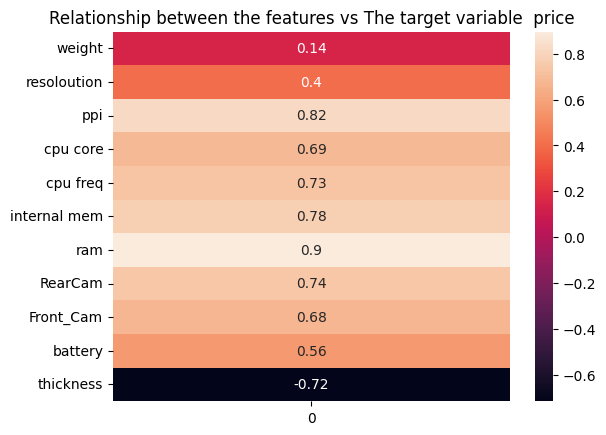

In [ ]:
target_correlation = features.corrwith(mobile_price['Price'])
sns.heatmap(data=target_correlation.to_frame(), annot=True, cmap="rocket")
plt.title("Relationship between the features vs The target variable  price")
plt.show()

##interpretation:
- Strongest Positive Correlation: ram (0.90)
- RAM has the highest positive correlation with price.
- This indicates that as RAM increases, the mobile price increases significantly.

- RAM is a key driver in pricing.


- Other Strong Positive Correlations:

- Features like ppi (0.82), cpu freq (0.78), internal mem (0.78), RearCam (0.74), and cpu core (0.69) also show strong positive relationships with price.
- These are critical hardware specifications that influence the product value

###Relationship Analysis:

In [ ]:
top4features = mobile_price[['ram','ppi','internal mem','cpu freq']]

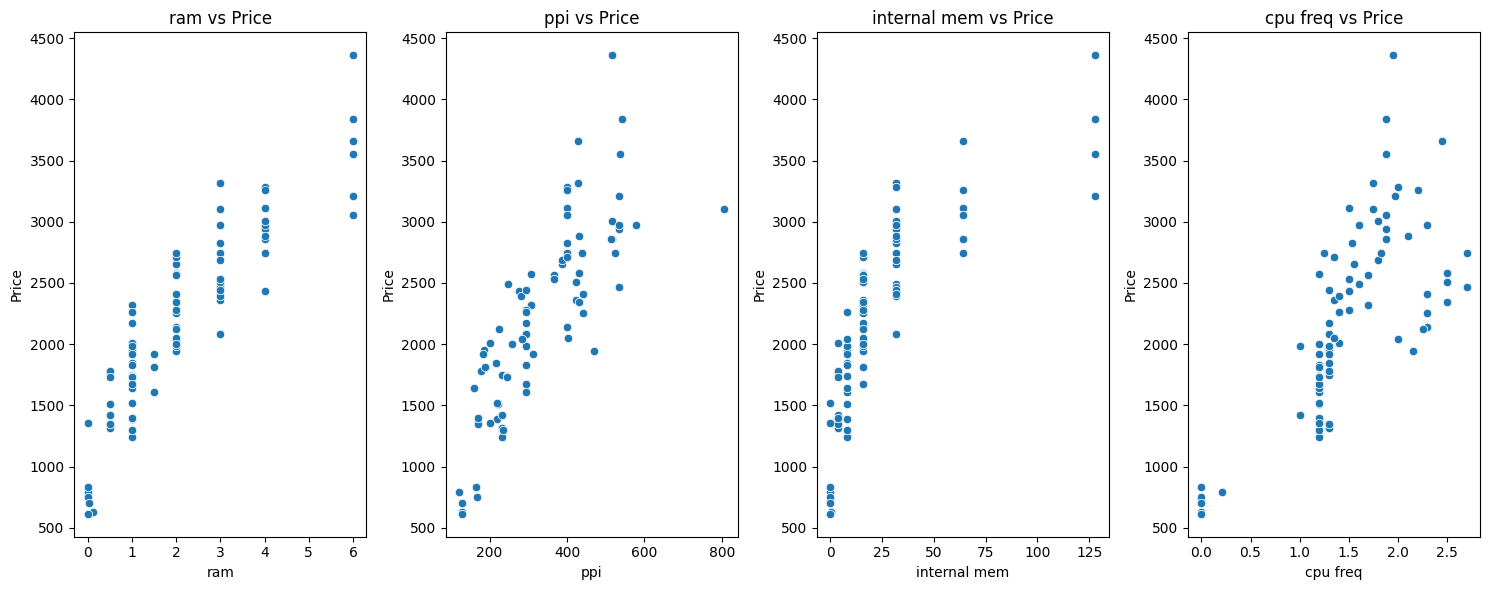

In [ ]:
plt.figure(figsize=(15,6))
for i, feature in enumerate(top4features):
    plt.subplot(1, 4, i+1)
    sns.scatterplot(data= mobile_price, x=feature, y='Price')
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

#2.	Prepare the Data:

In [ ]:
mobile_price.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


###Feature Selection:

In [ ]:
mobile_price.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [ ]:
mobile_price.columns[1:]

Index(['Price', 'Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq',
       'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

In [ ]:
mobile_price1 = mobile_price.drop(columns=['Product_id','Sale'],axis=1)
mobile_price1

,Price,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,1749,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,1916,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,1315,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,1749,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
156,3551,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,3211,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,3260,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,3211,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [ ]:
mobile_price1.shape

(161, 12)

In [ ]:
# X is feature
X= mobile_price1.drop(columns='Price')
X.shape

(161, 11)

In [ ]:
# y is target feature
y = mobile_price1['Price']
y.shape

(161,)

##Split the Dataset:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Divide the dataset into training and testing sets. Use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=42)
print(f"Dataset shape : {mobile_price1.shape}")
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

Dataset shape : (161, 12)
X_train shape : (128, 11)
X_test shape : (33, 11)
y_train shape : (128,)
y_test shape : (33,)


#3.	Build and Train the Model:

###Create a Linear Regression Model:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
 # Build a linear regression model using the training data.
model = LinearRegression()

###Train the Model:

In [ ]:
# Fit the model to the training data.
model.fit(X_train,y_train)

LinearRegression()

#4. Evaluate the Model:

###Predict:

In [ ]:
#Use the model to make predictions on the test set.
y_pred = model.predict(X_test)
y_pred

array([ 895.41673073, 1867.31472465, 2623.36964991, 1532.7260703 ,
       1619.41566171, 1870.23412863,  895.41673073, 1346.16633271,
       2358.2295049 , 2623.36964991, 1391.50752057, 1579.84860397,
       1759.8863008 , 2863.70446807, 2219.43518813, 2202.49860513,
       2487.07381494, 3047.83462591, 1466.01437563, 2202.49860513,
       2332.61550616, 1759.8863008 , 1904.92342917, 2426.46508592,
       3103.8397082 , 4156.80160305, 2415.38553546, 3398.02991276,
       2675.94638535, 2502.58312412, 3047.67012643, 2566.01306215,
       2550.31345198])

###Metrics Calculation:

In [ ]:
#Slope (Coefficient) and Intercept
model.coef_

array([ -0.86290228, -54.26649947,   1.13903052,  50.56008178,
       128.43078258,   4.80744451, 109.50557619,   1.94131529,
         3.97363931,   0.13680479, -71.27231423])

In [ ]:
model.intercept_

np.float64(1672.2803423415119)

###	Model Performance Metrics:

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
print("R² Score =", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE) =", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE)=", mean_squared_error(y_test, y_pred))

R² Score = 0.958798029509237
Mean Absolute Error (MAE) = 128.5537435521503
Mean Squared Error (MSE)= 23356.94509808272


#5.	Conclude the Analysis:

In [ ]:
X_test.head(3)

,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
105,78.4,2.4,166,0,0.0,0.0,0.008,0.0,0.0,1100,12.9
108,150.0,5.0,294,4,1.2,16.0,1.000,10.0,0.9,2200,8.5
142,152.0,5.2,424,4,2.5,16.0,3.000,20.7,2.2,3100,7.3


In [ ]:
y_test.head(3)

,Price
105,833
108,1676
142,2508


In [ ]:
X_test["Prediction price"] = y_pred
X_test.head(3)

,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,Prediction price
105,78.4,2.4,166,0,0.0,0.0,0.008,0.0,0.0,1100,12.9,895.416731
108,150.0,5.0,294,4,1.2,16.0,1.000,10.0,0.9,2200,8.5,1867.314725
142,152.0,5.2,424,4,2.5,16.0,3.000,20.7,2.2,3100,7.3,2623.369650


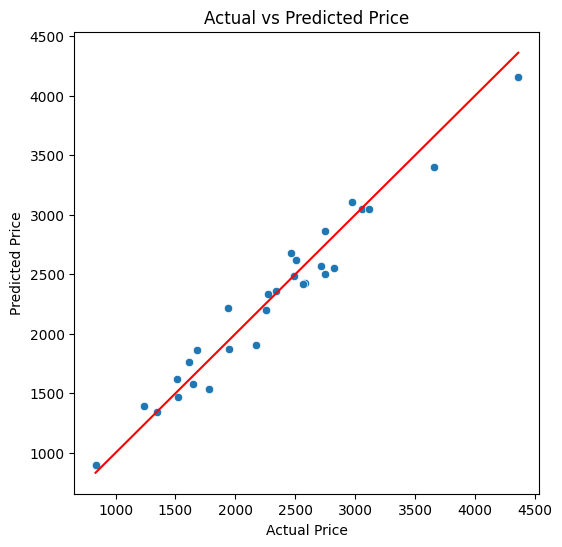

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

###Model Evaluation:

- MAE = 128.55: On average, your model's price predictions are off by about ₹128.55, which is quite low if the overall price range is in thousands.

-  MSE = 23,356: This value is influenced by larger errors, but in context with the R², it shows good performance.

-  R² = 0.95: Your model explains 95% of the variance in mobile prices. This indicates a very strong predictive performance.

###Conclusion:
The model’s performance is highly satisfactory. It predicts mobile prices accurately with small average errors and explains most of the variability in the data.

###Insights and Discussion:
 1.What insights did you gain from the correlation analysis and scatter plots?
- Features like RAM,ppi,internal memory,cpu frequcy show strong correlation with Price.

- Positive correlation: More RAM → higher price.

- Scatter plots showed linear relationships for some features, but some non-linearities too.
2.How do the selected features contribute to the prediction of mobile prices?   

- RAM had the strongest influence on price prediction.

- Battery and Internal memory also contributed significantly.

3.What do the slope (coefficient) and intercept reveal about the relationship between the features and the target variable?
- **Positive Coefficients** indicate features that **increase** the predicted price:
  - `Fc (Front Camera)`: Strongest impact — 1 MP increase adds ₹128.43 to price.
  - `Internal memory`: Significant impact — 1 GB adds ₹109.50.
- The **intercept** of the model is **₹1672.28**.
- This is the base price when all features are set to zero.

4.How well does the model perform based on the evaluation metrics? Are there any discrepancies between the predicted and actual values?
- Based on R² = 0.95, the model performs very well.
- Most points  close to the red diagonal → good prediction.

5.What might be some potential improvements or additional steps you could take to enhance the model’s performance?

-  **Feature Engineering**: Create new features, interaction terms, or transform existing ones to capture complex patterns.

-  **Check Feature Importance**: Eliminate weak or irrelevant features to reduce overfitting and improve model clarity.

- **Handle Multicollinearity**: Use VIF to identify and remove highly correlated features.
-  **Scale Features**: Standardize features if needed, especially for distance-based or kernel models.

-  **Outlier Treatment**: Identify and treat outliers that may skew the model.
By applying these steps, the model’s predictive performance can be improved and made more reliable across different datasets.

